In [2]:
%conda install pytorch

Unexpected error writing token file:
  path: /Users/akinn/.conda/aau_token_host
  exception: write() argument must be str, not None
2 channel Terms of Service accepted
Retrieving notices: - 2 channel Terms of Service accepted
Retrieving notices: done
done
Channels:
 - defaults
Platform: osx-arm64
 - defaults
Platform: osx-arm64
Solving environment: done
Solving environment| done
done

# All requested packages already installed.


# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import torch as t
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### $\text{Neural Network Surrogate Model}$
$\text{The original model is given by: }$

$$
G(\theta, \xi) = \theta^3 \xi^2 + \theta \, e^{-|0.2 - \xi|}
$$

$\text{where }$ $\theta$ $\text{ and}$ $\xi$ $\text{ are input variables in }$ $[0, 1]$.

In [14]:
np.random.seed(42)

n_samples = 10000
theta_samples = np.random.uniform(0, 1, n_samples)
xi_samples = np.random.uniform(0, 1, n_samples)

G_theta_xi = theta_samples**3 * xi_samples**2 + theta_samples * np.exp(-np.abs(0.2 - xi_samples))

x = np.column_stack((theta_samples, xi_samples))
y = G_theta_xi
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [15]:
def nn_model_1(no_of_features, hidden_layer, no_of_outputs):
    model = t.nn.Sequential(
        t.nn.Linear(no_of_features, hidden_layer),
        t.nn.Sigmoid(),
        t.nn.Linear(hidden_layer, no_of_outputs)
    )
    return model

def nn_model_2(no_of_features, hidden_layer, no_of_outputs):
    model = t.nn.Sequential(
        t.nn.Linear(no_of_features, hidden_layer),
        t.nn.ReLU(),
        t.nn.Linear(hidden_layer, no_of_outputs)
    )
    return model

def nn_model_3(no_of_features, hidden_layer_1, hidden_layer_2, hidden_layer_3, no_of_outputs):
    model = t.nn.Sequential(
        t.nn.Linear(no_of_features, hidden_layer_1),
        t.nn.Sigmoid(),
        t.nn.Linear(hidden_layer_1, hidden_layer_2),
        t.nn.Sigmoid(),
        t.nn.Linear(hidden_layer_2, hidden_layer_3),
        t.nn.Sigmoid(),
        t.nn.Linear(hidden_layer_3, no_of_outputs)
    )
    return model

def nn_model_4(no_of_features, hidden_layer_1, hidden_layer_2, hidden_layer_3, no_of_outputs):
    model = t.nn.Sequential(
        t.nn.Linear(no_of_features, hidden_layer_1),
        t.nn.ReLU(),
        t.nn.Linear(hidden_layer_1, hidden_layer_2),
        t.nn.ReLU(),
        t.nn.Linear(hidden_layer_2, hidden_layer_3),
        t.nn.ReLU(),
        t.nn.Linear(hidden_layer_3, no_of_outputs)
    )
    return model

def train_model(model, x_train, y_train, epochs, learning_rate):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = t.nn.MSELoss()
    
    x_train_tensor = t.tensor(x_train, dtype=t.float32)
    y_train_tensor = t.tensor(y_train, dtype=t.float32).view(-1, 1)
    
    model.train()
    epoch_list = []
    loss_list = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(x_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
        
        epoch_list.append(epoch+1)
        loss_list.append(loss.item())

    return model, epoch_list, loss_list

def evaluate_model(model, x_validate, y_validate):
    model.eval()
    x_validate_tensor = t.tensor(x_validate, dtype=t.float32)
    with t.no_grad():
        predictions = model(x_validate_tensor).numpy().flatten()
    mse = np.mean((predictions - y_validate) ** 2)
    return mse, predictions

In [16]:
np.random.seed(42)

n_samples = 10000
theta_samples = np.random.uniform(0, 1, n_samples)
xi_samples = np.random.uniform(0, 1, n_samples)

G_theta_xi = theta_samples**3 * xi_samples**2 + theta_samples * np.exp(-np.abs(0.2 - xi_samples))
x = np.column_stack((theta_samples, xi_samples))
y = G_theta_xi
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

$\text{Neural Network Description}$
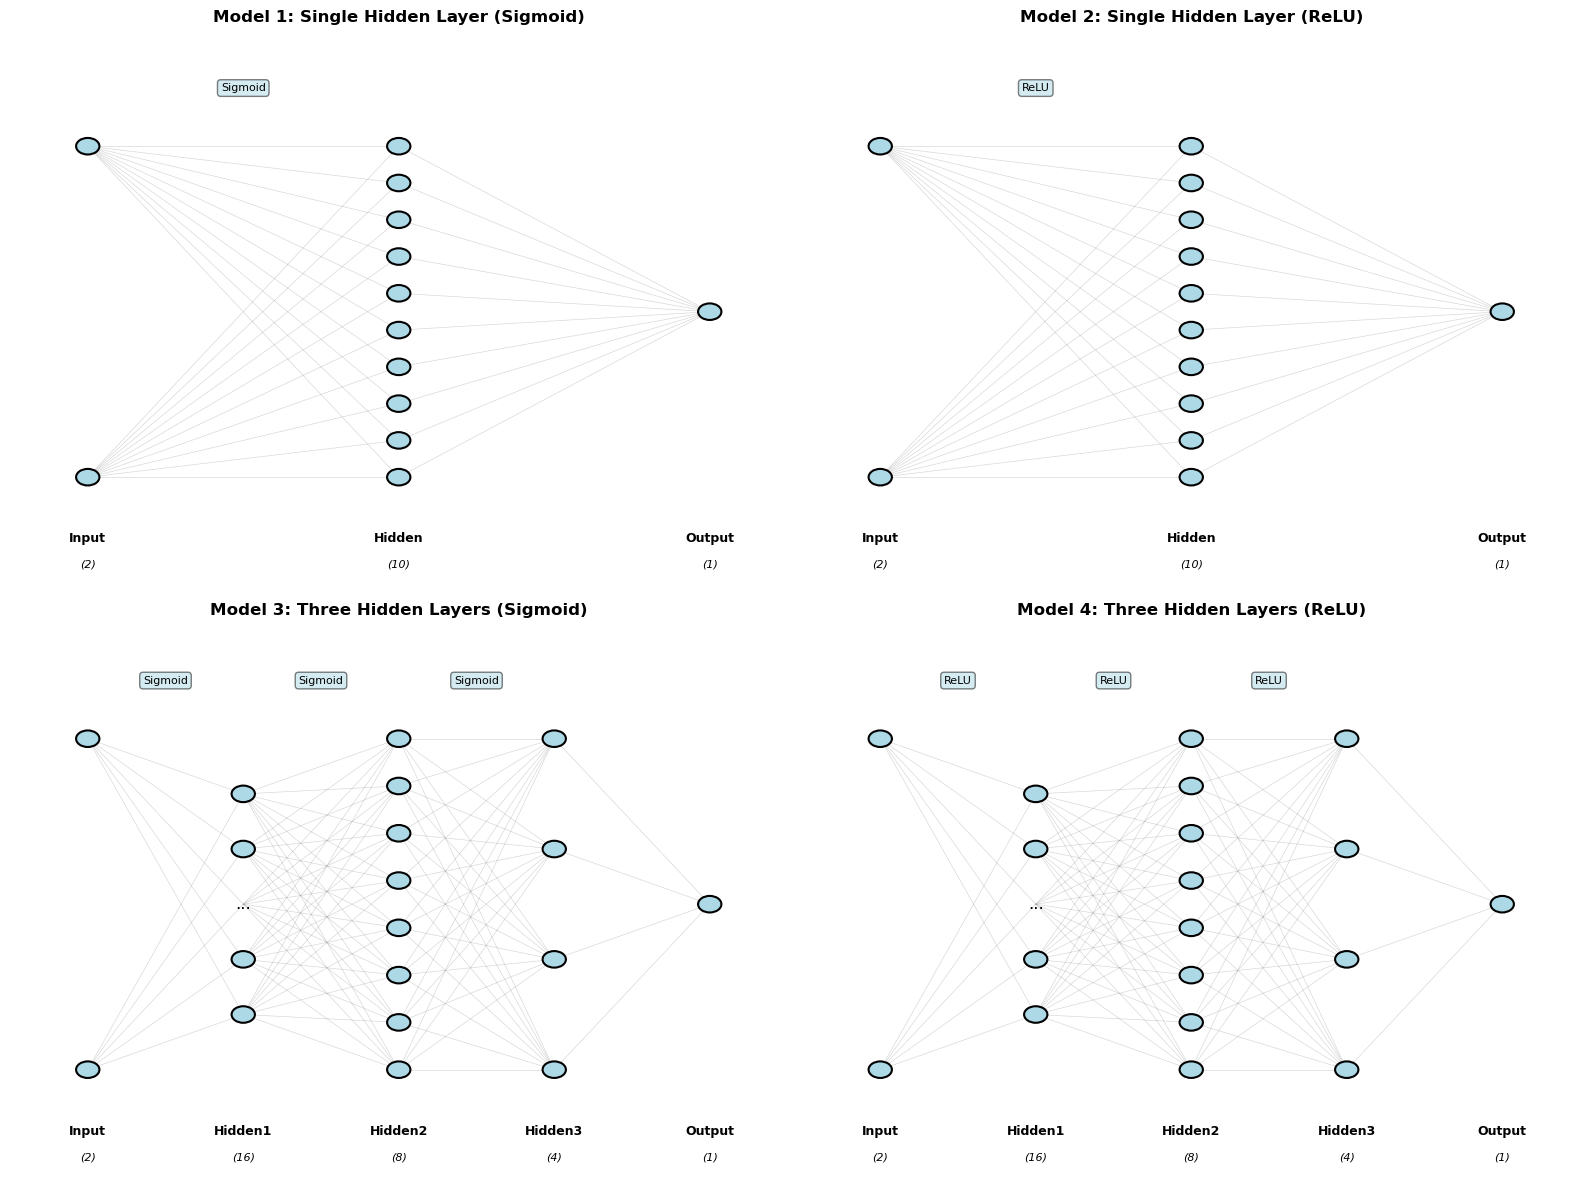

In [17]:
model1 = nn_model_1(2, 10, 1)
model2 = nn_model_2(2, 10, 1)
model3 = nn_model_3(2, 16, 8, 4, 1)
model4 = nn_model_4(2, 16, 8, 4, 1)

learning_rate  = [0.001, 0.01, 0.1]
epochs = [500, 1000, 2000]


Training with learning rate: 0.001, epochs: 500
Model 1 epochs: 500, learning rate: 0.001, MSE: 0.0652
Model 2 epochs: 500, learning rate: 0.001, MSE: 0.0044
Model 3 epochs: 500, learning rate: 0.001, MSE: 0.0886
Model 4 epochs: 500, learning rate: 0.001, MSE: 0.0009
Model 1 epochs: 500, learning rate: 0.001, MSE: 0.0652
Model 2 epochs: 500, learning rate: 0.001, MSE: 0.0044
Model 3 epochs: 500, learning rate: 0.001, MSE: 0.0886
Model 4 epochs: 500, learning rate: 0.001, MSE: 0.0009


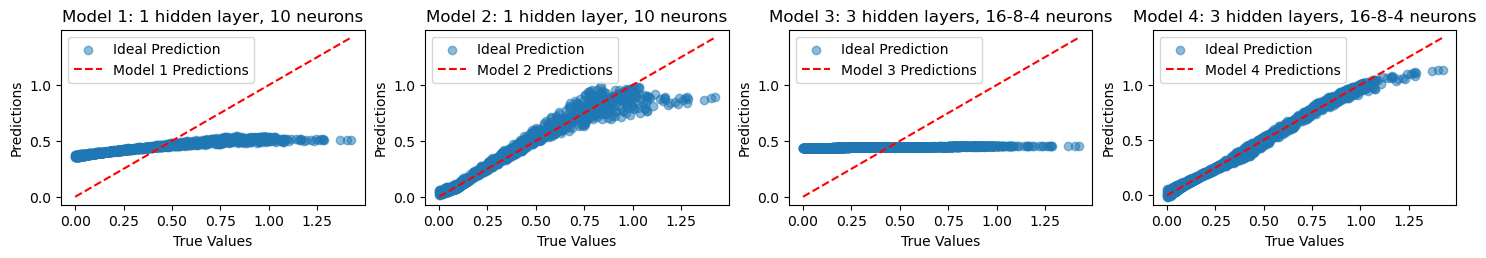

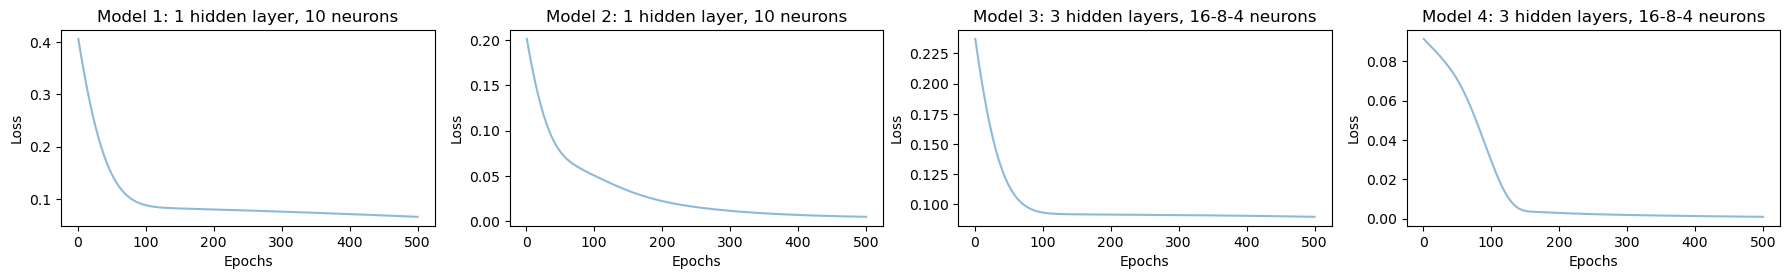


Training with learning rate: 0.001, epochs: 1000
Model 1 epochs: 1000, learning rate: 0.001, MSE: 0.0039
Model 2 epochs: 1000, learning rate: 0.001, MSE: 0.0008
Model 3 epochs: 1000, learning rate: 0.001, MSE: 0.0025
Model 4 epochs: 1000, learning rate: 0.001, MSE: 0.0001
Model 1 epochs: 1000, learning rate: 0.001, MSE: 0.0039
Model 2 epochs: 1000, learning rate: 0.001, MSE: 0.0008
Model 3 epochs: 1000, learning rate: 0.001, MSE: 0.0025
Model 4 epochs: 1000, learning rate: 0.001, MSE: 0.0001


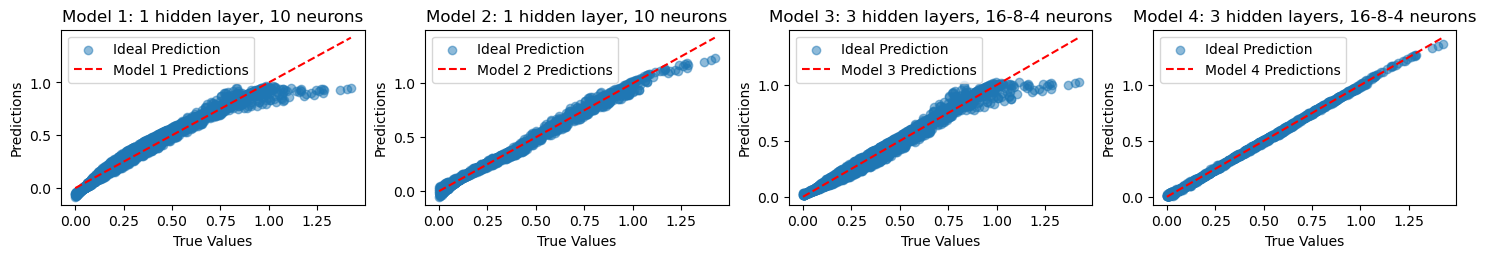

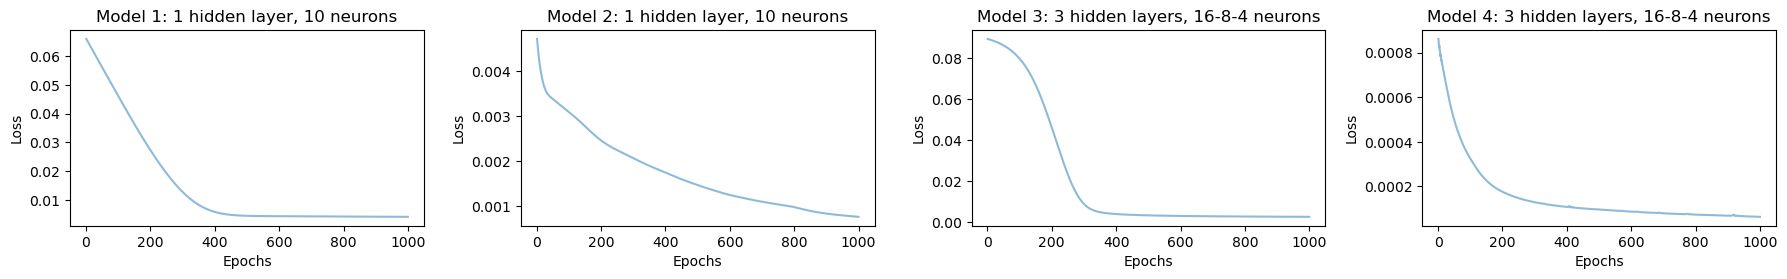


Training with learning rate: 0.001, epochs: 2000
Model 1 epochs: 2000, learning rate: 0.001, MSE: 0.0016
Model 2 epochs: 2000, learning rate: 0.001, MSE: 0.0002
Model 3 epochs: 2000, learning rate: 0.001, MSE: 0.0004
Model 4 epochs: 2000, learning rate: 0.001, MSE: 0.0001
Model 1 epochs: 2000, learning rate: 0.001, MSE: 0.0016
Model 2 epochs: 2000, learning rate: 0.001, MSE: 0.0002
Model 3 epochs: 2000, learning rate: 0.001, MSE: 0.0004
Model 4 epochs: 2000, learning rate: 0.001, MSE: 0.0001


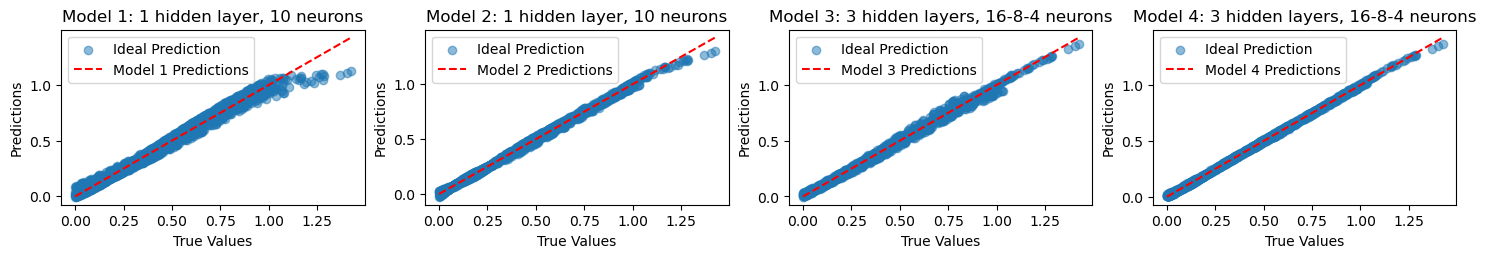

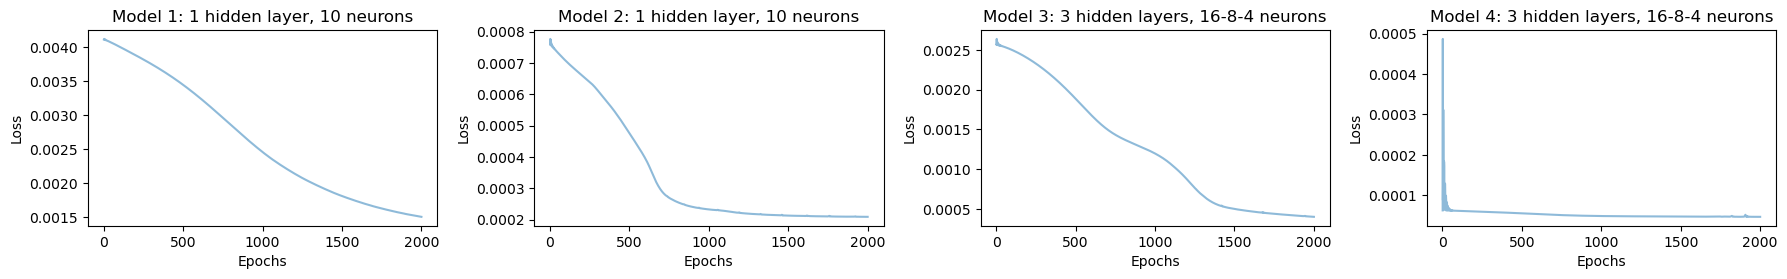


Training with learning rate: 0.01, epochs: 500
Model 1 epochs: 500, learning rate: 0.01, MSE: 0.0015
Model 2 epochs: 500, learning rate: 0.01, MSE: 0.0002
Model 3 epochs: 500, learning rate: 0.01, MSE: 0.0004
Model 4 epochs: 500, learning rate: 0.01, MSE: 0.0001
Model 1 epochs: 500, learning rate: 0.01, MSE: 0.0015
Model 2 epochs: 500, learning rate: 0.01, MSE: 0.0002
Model 3 epochs: 500, learning rate: 0.01, MSE: 0.0004
Model 4 epochs: 500, learning rate: 0.01, MSE: 0.0001


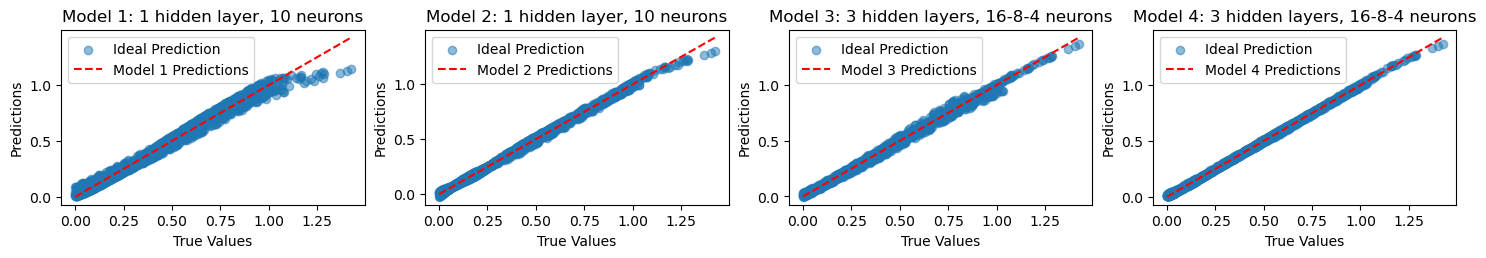

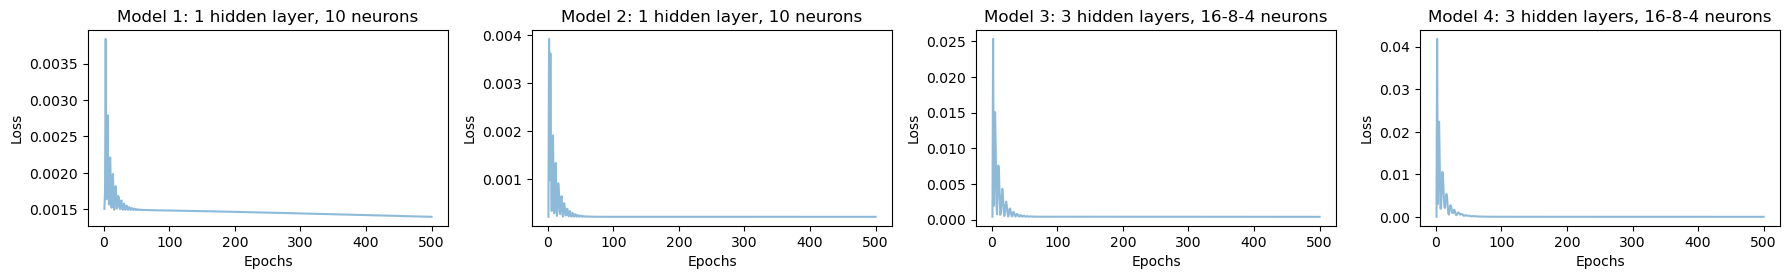


Training with learning rate: 0.01, epochs: 1000
Model 1 epochs: 1000, learning rate: 0.01, MSE: 0.0013
Model 2 epochs: 1000, learning rate: 0.01, MSE: 0.0002
Model 3 epochs: 1000, learning rate: 0.01, MSE: 0.0003
Model 4 epochs: 1000, learning rate: 0.01, MSE: 0.0000
Model 1 epochs: 1000, learning rate: 0.01, MSE: 0.0013
Model 2 epochs: 1000, learning rate: 0.01, MSE: 0.0002
Model 3 epochs: 1000, learning rate: 0.01, MSE: 0.0003
Model 4 epochs: 1000, learning rate: 0.01, MSE: 0.0000


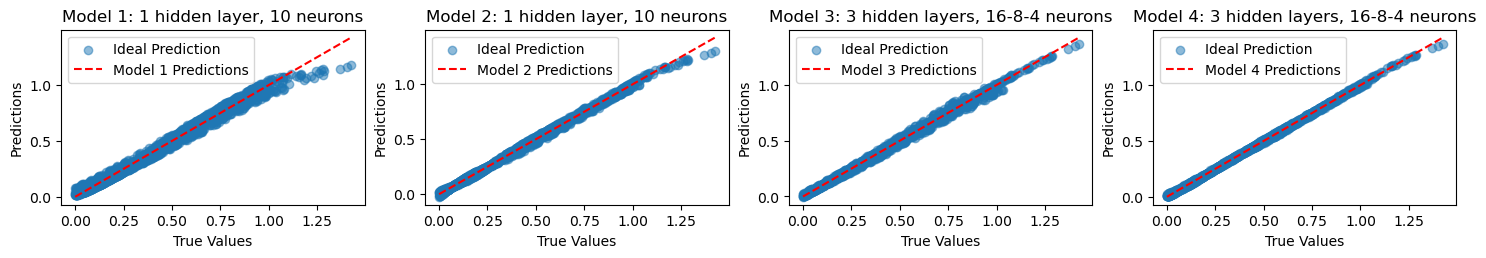

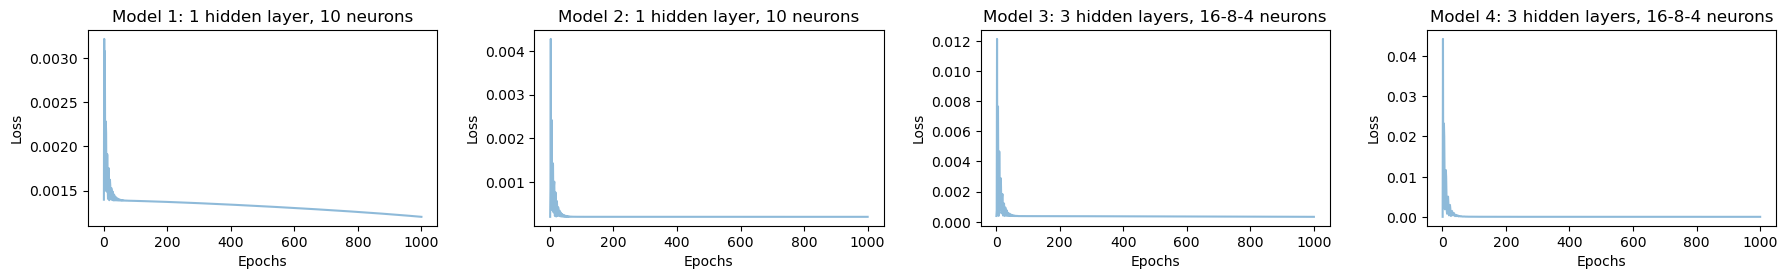


Training with learning rate: 0.01, epochs: 2000
Model 1 epochs: 2000, learning rate: 0.01, MSE: 0.0004
Model 2 epochs: 2000, learning rate: 0.01, MSE: 0.0002
Model 3 epochs: 2000, learning rate: 0.01, MSE: 0.0003
Model 4 epochs: 2000, learning rate: 0.01, MSE: 0.0000
Model 1 epochs: 2000, learning rate: 0.01, MSE: 0.0004
Model 2 epochs: 2000, learning rate: 0.01, MSE: 0.0002
Model 3 epochs: 2000, learning rate: 0.01, MSE: 0.0003
Model 4 epochs: 2000, learning rate: 0.01, MSE: 0.0000


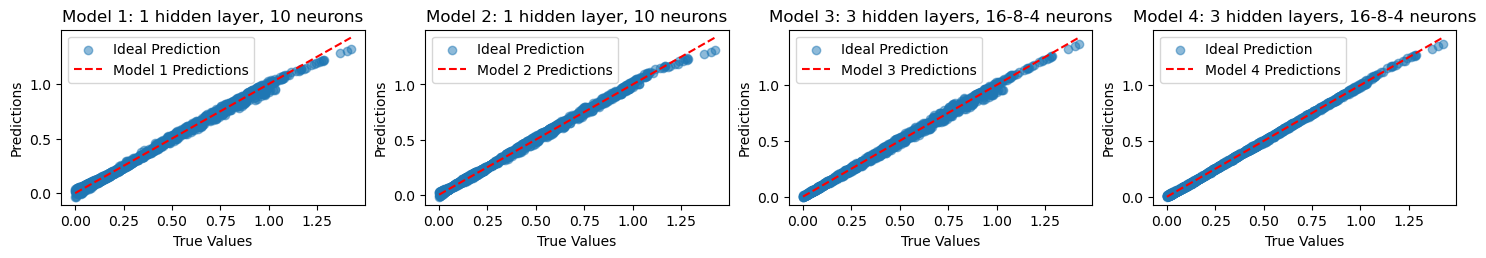

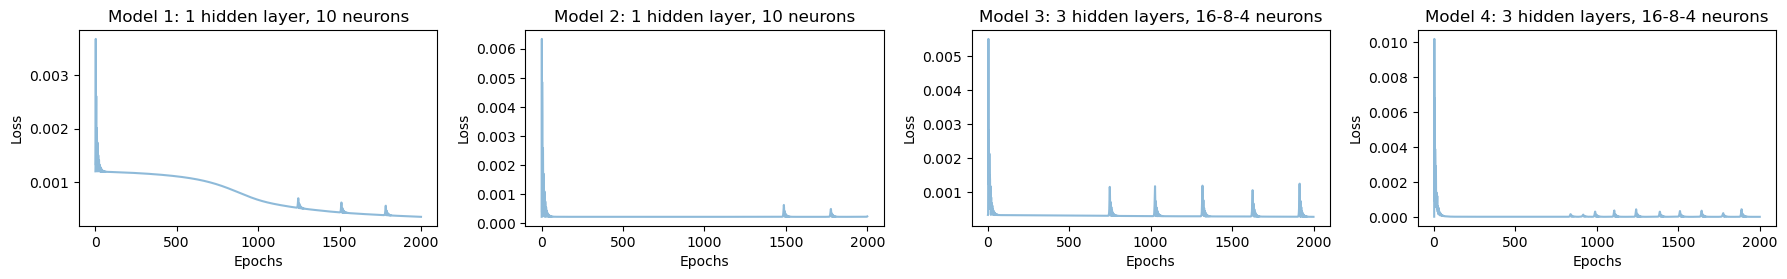


Training with learning rate: 0.1, epochs: 500
Model 1 epochs: 500, learning rate: 0.1, MSE: 0.0003
Model 2 epochs: 500, learning rate: 0.1, MSE: 0.0015
Model 3 epochs: 500, learning rate: 0.1, MSE: 0.0013
Model 4 epochs: 500, learning rate: 0.1, MSE: 0.0018
Model 1 epochs: 500, learning rate: 0.1, MSE: 0.0003
Model 2 epochs: 500, learning rate: 0.1, MSE: 0.0015
Model 3 epochs: 500, learning rate: 0.1, MSE: 0.0013
Model 4 epochs: 500, learning rate: 0.1, MSE: 0.0018


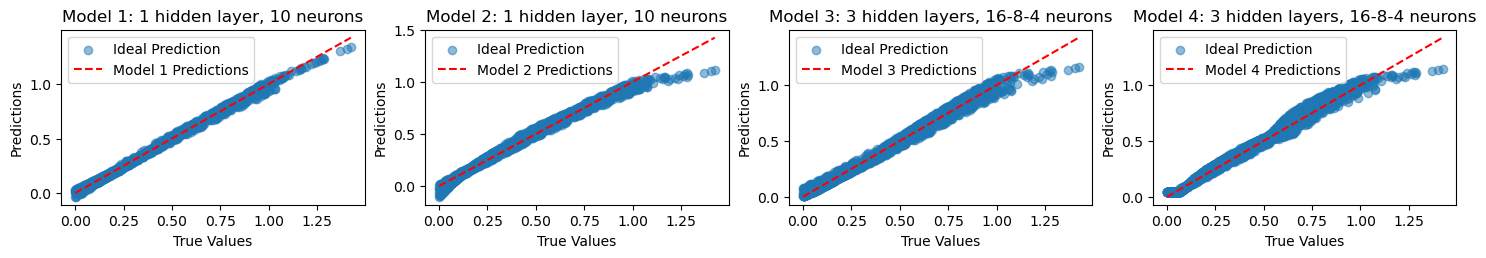

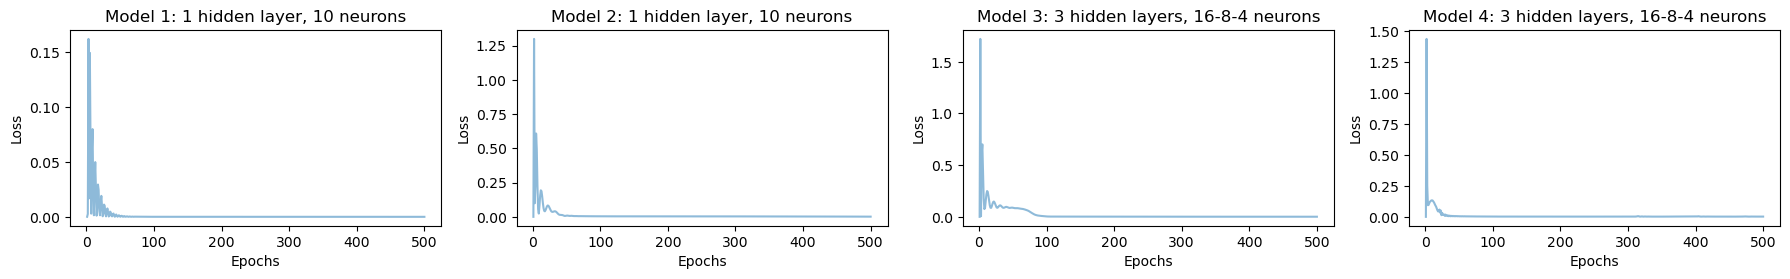


Training with learning rate: 0.1, epochs: 1000
Model 1 epochs: 1000, learning rate: 0.1, MSE: 0.0002
Model 2 epochs: 1000, learning rate: 0.1, MSE: 0.0035
Model 3 epochs: 1000, learning rate: 0.1, MSE: 0.0028
Model 4 epochs: 1000, learning rate: 0.1, MSE: 0.0003
Model 1 epochs: 1000, learning rate: 0.1, MSE: 0.0002
Model 2 epochs: 1000, learning rate: 0.1, MSE: 0.0035
Model 3 epochs: 1000, learning rate: 0.1, MSE: 0.0028
Model 4 epochs: 1000, learning rate: 0.1, MSE: 0.0003


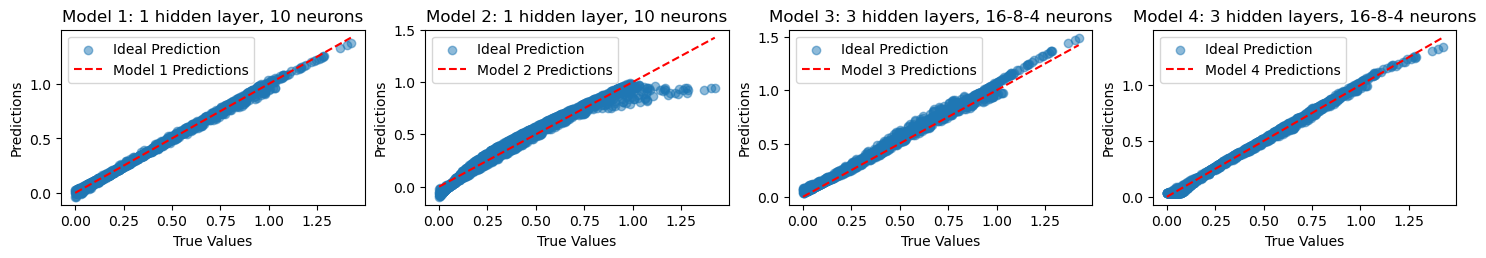

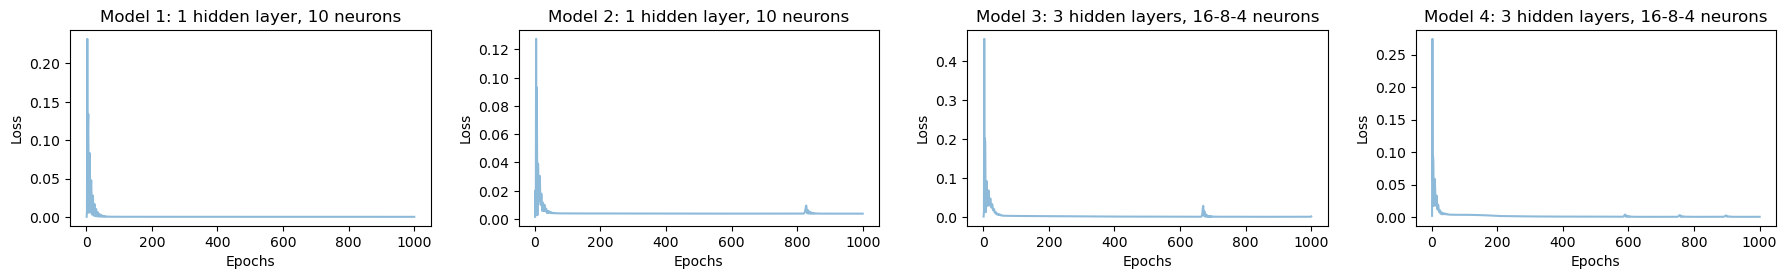


Training with learning rate: 0.1, epochs: 2000
Model 1 epochs: 2000, learning rate: 0.1, MSE: 0.0001
Model 2 epochs: 2000, learning rate: 0.1, MSE: 0.0160
Model 3 epochs: 2000, learning rate: 0.1, MSE: 0.0026
Model 4 epochs: 2000, learning rate: 0.1, MSE: 0.0005
Model 1 epochs: 2000, learning rate: 0.1, MSE: 0.0001
Model 2 epochs: 2000, learning rate: 0.1, MSE: 0.0160
Model 3 epochs: 2000, learning rate: 0.1, MSE: 0.0026
Model 4 epochs: 2000, learning rate: 0.1, MSE: 0.0005


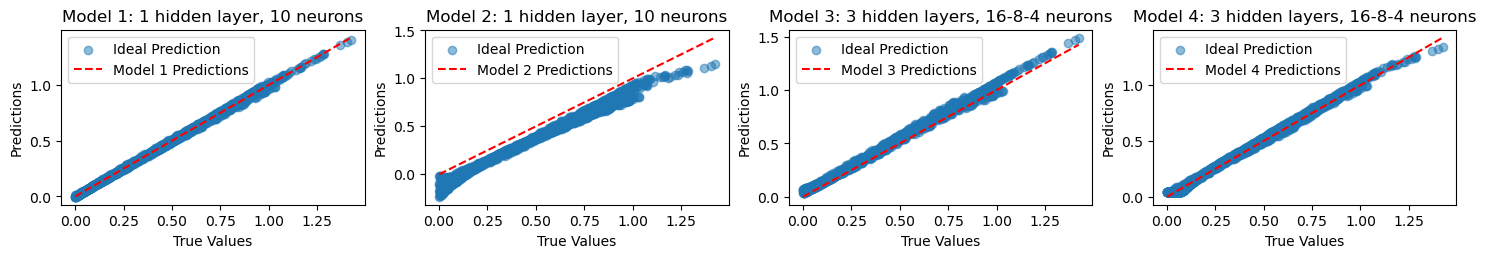

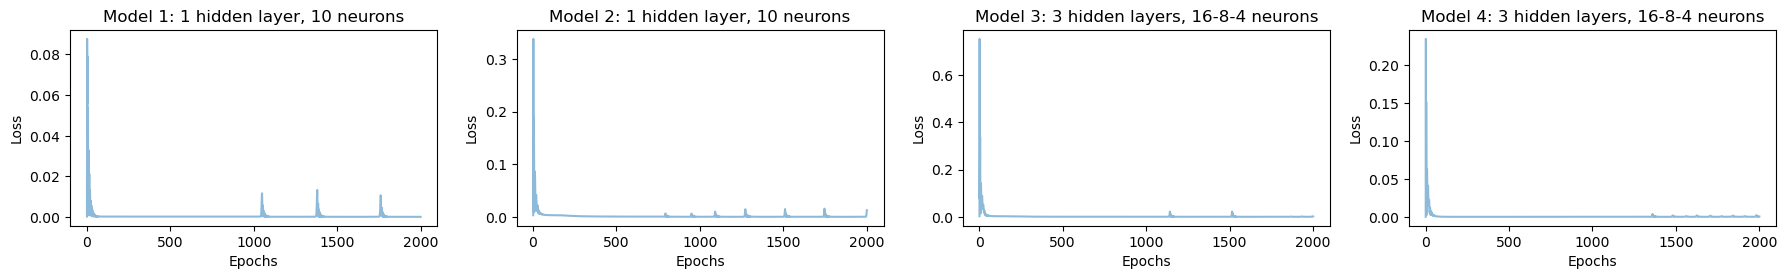

In [18]:
for lr in learning_rate:
    for ep in epochs:
        print(f"\nTraining with learning rate: {lr}, epochs: {ep}")
        model1, epoch_list1, loss_list1 = train_model(model1, x_train, y_train, epochs=ep, learning_rate=lr)
        model2, epoch_list2, loss_list2 = train_model(model2, x_train, y_train, epochs=ep, learning_rate=lr)
        model3, epoch_list3, loss_list3 = train_model(model3, x_train, y_train, epochs=ep, learning_rate=lr)
        model4, epoch_list4, loss_list4 = train_model(model4, x_train, y_train, epochs=ep, learning_rate=lr)
        mse1, preds1 = evaluate_model(model1, x_validate, y_validate)
        mse2, preds2 = evaluate_model(model2, x_validate, y_validate)
        mse3, preds3 = evaluate_model(model3, x_validate, y_validate)
        mse4, preds4 = evaluate_model(model4, x_validate, y_validate)

        print(f"Model 1 epochs: {ep}, learning rate: {lr}, MSE: {mse1:.4f}")
        print(f"Model 2 epochs: {ep}, learning rate: {lr}, MSE: {mse2:.4f}")
        print(f"Model 3 epochs: {ep}, learning rate: {lr}, MSE: {mse3:.4f}")
        print(f"Model 4 epochs: {ep}, learning rate: {lr}, MSE: {mse4:.4f}")
        
        plt.figure(figsize=(18, 5))
        plt.subplot(2, 4, 1)
        plt.scatter(y_validate, preds1, alpha=0.5)
        plt.plot([min(y_validate), max(y_validate)], [min(y_validate), max(y_validate)], 'r--')
        plt.title('Model 1: 1 hidden layer, 10 neurons')
        plt.legend(['Ideal Prediction', 'Model 1 Predictions'])
        plt.xlabel('True Values')
        plt.ylabel('Predictions') 

        plt.subplot(2, 4, 2)
        plt.scatter(y_validate, preds2, alpha=0.5)
        plt.plot([min(y_validate), max(y_validate)], [min(y_validate), max(y_validate)], 'r--')
        plt.title('Model 2: 1 hidden layer, 10 neurons')
        plt.legend(['Ideal Prediction', 'Model 2 Predictions'])
        plt.xlabel('True Values')
        plt.ylabel('Predictions') 

        plt.subplot(2, 4, 3)
        plt.scatter(y_validate, preds3, alpha=0.5)
        plt.plot([min(y_validate), max(y_validate)], [min(y_validate), max(y_validate)], 'r--')
        plt.title('Model 3: 3 hidden layers, 16-8-4 neurons')
        plt.legend(['Ideal Prediction', 'Model 3 Predictions'])
        plt.xlabel('True Values')
        plt.ylabel('Predictions')  

        plt.subplot(2, 4, 4)
        plt.scatter(y_validate, preds4, alpha=0.5)
        plt.plot([min(y_validate), max(y_validate)], [min(y_validate), max(y_validate)], 'r--')
        plt.title('Model 4: 3 hidden layers, 16-8-4 neurons')
        plt.legend(['Ideal Prediction', 'Model 4 Predictions'])
        plt.xlabel('True Values')
        plt.ylabel('Predictions')  

        plt.figure(figsize=(18, 5))
        plt.subplot(2, 4, 5)
        plt.plot(epoch_list1, loss_list1, alpha=0.5)
        plt.title('Model 1: 1 hidden layer, 10 neurons')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')

        plt.subplot(2, 4, 6)
        plt.plot(epoch_list2, loss_list2, alpha=0.5)
        plt.title('Model 2: 1 hidden layer, 10 neurons')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')

        plt.subplot(2, 4, 7)
        plt.plot(epoch_list3, loss_list3, alpha=0.5)
        plt.title('Model 3: 3 hidden layers, 16-8-4 neurons')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')

        plt.subplot(2, 4, 8)
        plt.plot(epoch_list4, loss_list4, alpha=0.5)
        plt.title('Model 4: 3 hidden layers, 16-8-4 neurons')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')

        plt.tight_layout()
        plt.show()

#### $\text{Question 1b}$

Text(0.5, 0, '$\\xi$')

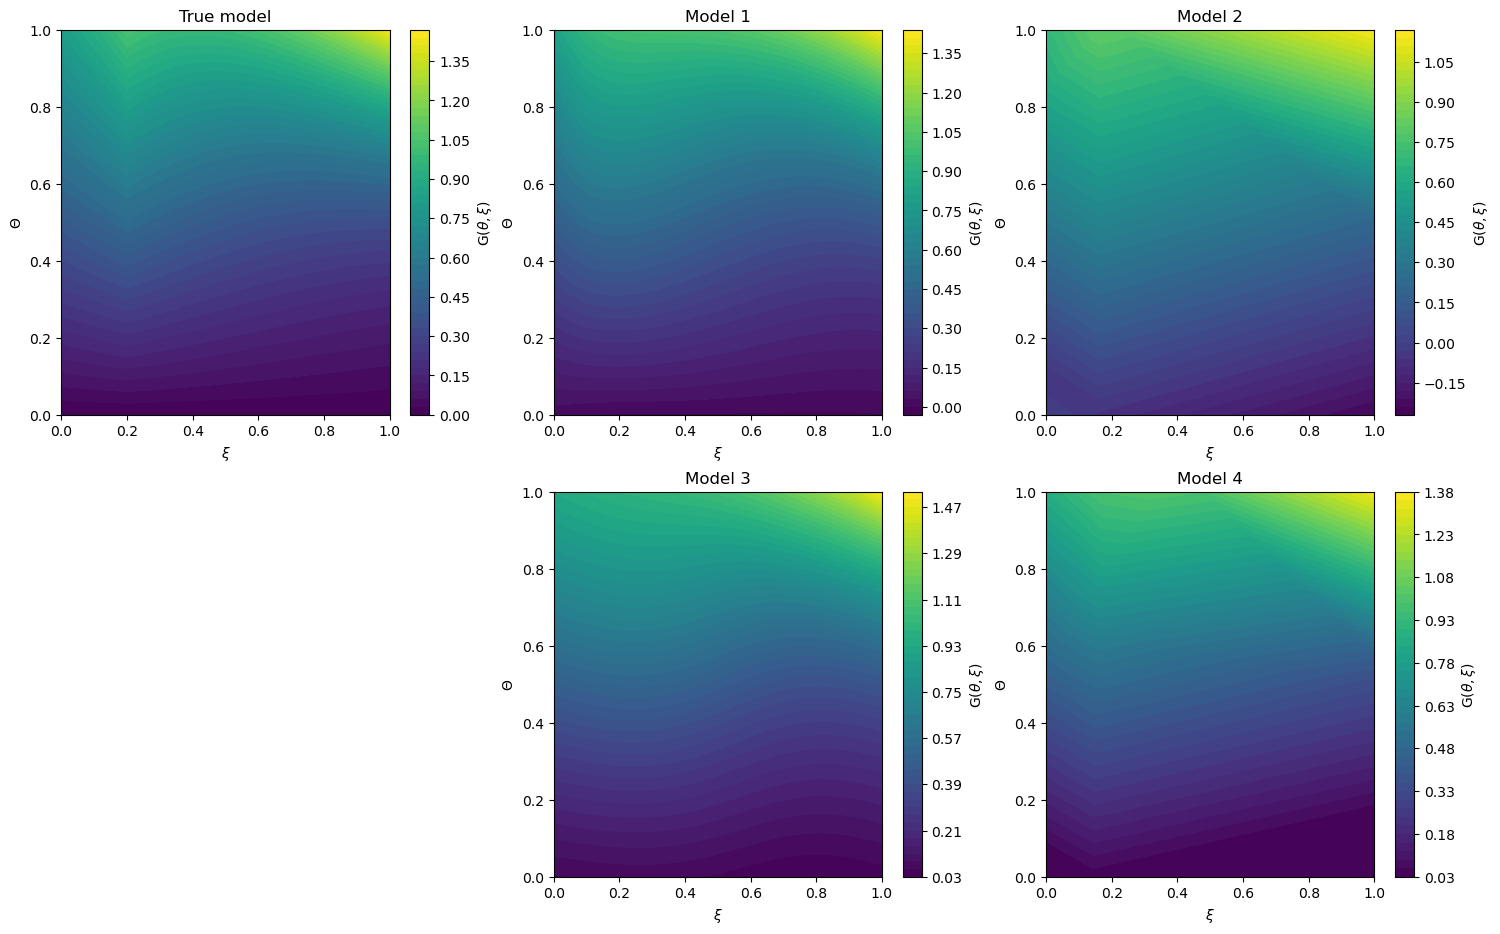

In [ ]:
theta_samples_grid = np.linspace(0, 1, 1000)
xi_samples_grid = np.linspace(0, 1, 1000)
Theta, Xi = np.meshgrid(theta_samples_grid, xi_samples_grid)

G_theta_xi_grid = Theta**3 * Xi**2 + Theta * np.exp(-np.abs(0.2 - Xi))


grid_points = np.column_stack((Theta.ravel(), Xi.ravel()))
selected_model1 = model1 # I am using last models trained, that is models with 2000 epochs and 0.1 learning rate to avoid retaining all models
selected_model2 = model2
selected_model3 = model3
selected_model4 = model4

grid_tensor = t.tensor(grid_points, dtype=t.float32)
with t.no_grad():
    Y_grid_pred1 = selected_model1(grid_tensor).numpy().flatten().reshape(Theta.shape)
    Y_grid_pred2 = selected_model2(grid_tensor).numpy().flatten().reshape(Theta.shape)
    Y_grid_pred3 = selected_model3(grid_tensor).numpy().flatten().reshape(Theta.shape)
    Y_grid_pred4 = selected_model4(grid_tensor).numpy().flatten().reshape(Theta.shape)

plt.figure(figsize=(18, 11))


plt.subplot(2, 3, 1)
plt.contourf(Xi, Theta, G_theta_xi_grid, levels=50, cmap='viridis')
plt.colorbar(label=r'G$(\theta, \xi)$')
plt.title('True model')
plt.ylabel(r'$\Theta$')
plt.xlabel(r'$\xi$')

plt.subplot(2, 3, 2)
plt.contourf(Xi, Theta, Y_grid_pred1, levels=50, cmap='viridis')
plt.colorbar(label=r'G$(\theta, \xi)$')
plt.title('Model 1')
plt.ylabel(r'$\Theta$')
plt.xlabel(r'$\xi$')

plt.subplot(2, 3, 3)
plt.contourf(Xi, Theta, Y_grid_pred2, levels=50, cmap='viridis')
plt.colorbar(label=r'G$(\theta, \xi)$')
plt.title('Model 2')
plt.ylabel(r'$\Theta$')
plt.xlabel(r'$\xi$')

plt.subplot(2, 3, 5)
plt.contourf(Xi, Theta, Y_grid_pred3, levels=50, cmap='viridis')
plt.colorbar(label=r'G$(\theta, \xi)$')
plt.title('Model 3')
plt.ylabel(r'$\Theta$')
plt.xlabel(r'$\xi$')

plt.subplot(2, 3, 6)
plt.contourf(Xi, Theta, Y_grid_pred4, levels=50, cmap='viridis')
plt.colorbar(label=r'G$(\theta, \xi)$')
plt.title('Model 4')
plt.ylabel(r'$\Theta$')
plt.xlabel(r'$\xi$')

#### $\text{Bayesian Optimal Experimental Design.}$

$\text{The original model with noisy measurement is given by: }$

$$
G(\theta, \xi) = \theta^3 \xi^2 + \theta \, e^{-|0.2 - \xi|} + \epsilon
$$

$\text{where }$ $\epsilon \sim \mathcal{N}(0, \sigma_\epsilon^2)$  $\text{ with }$ $\sigma_\epsilon = 10^{-2}$

##### $\text{Using Nested Monte Carlo Estimator for the Expected Information Gain}$

$$U(\xi) \approx \frac{1}{N}\sum_{i=1}^{N}\left\{\log f(y^{(i)}|\theta^{(i)}, \xi) - \log\left[\frac{1}{M}\sum_{j=1}^{M}f(y^{(i)}|\tilde{\theta}^{(i,j)}, \xi)\right]\right\}$$

In [51]:
import time
N = 10000  # Outer Monte Carlo samples
M = 10000   # Inner Monte Carlo samples
sigma = 0.01

xi_test_values = np.linspace(0, 1, 100)
U_xi_values = []

start_time = time.time()
for xi_test in xi_test_values:
    eig_terms = []
    
    for i in range(N):
        theta_i = np.random.uniform(0, 1)
        nn_input_i = t.tensor([[theta_i, xi_test]], dtype=t.float32)
        with t.no_grad():
            y_i_pred = selected_model1(nn_input_i).numpy().flatten()[0] #Using model 1 for this calculation
        y_i = y_i_pred + np.random.normal(0, sigma)
        log_f = -0.5 * np.log(2 * np.pi * sigma**2) - (y_i - y_i_pred)**2 / (2 * sigma**2)
        
        inner_sum = 0
        for j in range(M):
            theta_tilde_ij = np.random.uniform(0, 1)
            nn_input_ij = t.tensor([[theta_tilde_ij, xi_test]], dtype=t.float32)
            with t.no_grad():
                y_pred_ij = selected_model1(nn_input_ij).numpy().flatten()[0] #Using model 1 for this calculation
            f_j = np.exp(-0.5 * np.log(2 * np.pi * sigma**2) - (y_i - y_pred_ij)**2 / (2 * sigma**2))
            inner_sum += f_j

        log_inner_avg = np.log(inner_sum / M)
        eig_term = log_f - log_inner_avg
        eig_terms.append(eig_term)

    U_xi = np.mean(eig_terms)
    U_xi_values.append(U_xi)
    print(f"Computed U(ξ) for ξ={xi_test:.4f}: U(ξ)={U_xi:.4f}")
print("time in minutes to run: "), (start_time-time.time())/60
U_xi_values = np.array(U_xi_values)

Computed U(ξ) for ξ=0.0000: U(ξ)=2.9738
Computed U(ξ) for ξ=0.0101: U(ξ)=2.9948
Computed U(ξ) for ξ=0.0101: U(ξ)=2.9948
Computed U(ξ) for ξ=0.0202: U(ξ)=3.0236
Computed U(ξ) for ξ=0.0202: U(ξ)=3.0236
Computed U(ξ) for ξ=0.0303: U(ξ)=3.0361
Computed U(ξ) for ξ=0.0303: U(ξ)=3.0361
Computed U(ξ) for ξ=0.0404: U(ξ)=3.0580
Computed U(ξ) for ξ=0.0404: U(ξ)=3.0580
Computed U(ξ) for ξ=0.0505: U(ξ)=3.0728
Computed U(ξ) for ξ=0.0505: U(ξ)=3.0728
Computed U(ξ) for ξ=0.0606: U(ξ)=3.0849
Computed U(ξ) for ξ=0.0606: U(ξ)=3.0849
Computed U(ξ) for ξ=0.0707: U(ξ)=3.0979
Computed U(ξ) for ξ=0.0707: U(ξ)=3.0979
Computed U(ξ) for ξ=0.0808: U(ξ)=3.1167
Computed U(ξ) for ξ=0.0808: U(ξ)=3.1167
Computed U(ξ) for ξ=0.0909: U(ξ)=3.1273
Computed U(ξ) for ξ=0.0909: U(ξ)=3.1273
Computed U(ξ) for ξ=0.1010: U(ξ)=3.1450
Computed U(ξ) for ξ=0.1010: U(ξ)=3.1450
Computed U(ξ) for ξ=0.1111: U(ξ)=3.1433
Computed U(ξ) for ξ=0.1111: U(ξ)=3.1433
Computed U(ξ) for ξ=0.1212: U(ξ)=3.1490
Computed U(ξ) for ξ=0.1212: U(ξ)=3.1490


$\text{This is what I got with }$ $N = 10^3$ $\text{ and }$ $M = 10^3$ $\text{ which is not smooth. }$

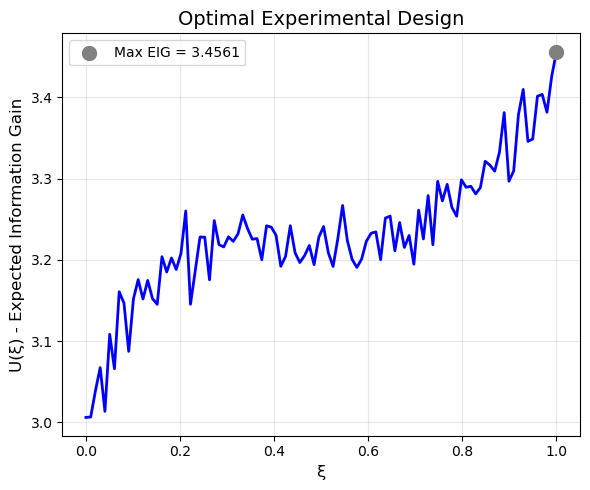

$\text{So I repeated the run with }$ $N = 10^4$ $\text{ and }$ $M = 10^4$ $\text{to see if i can get a closer smoothness like the paper referenced figure.}$

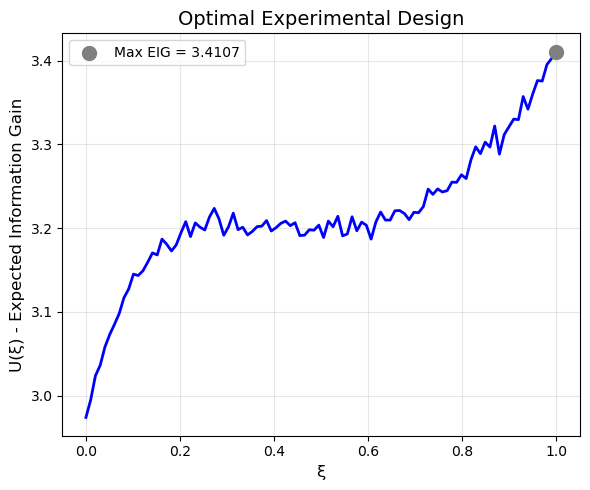

In [53]:
plt.figure(figsize=(6, 5))
plt.plot(xi_test_values, U_xi_values, 'b-', linewidth=2)
plt.xlabel('ξ', fontsize=12)
plt.ylabel('U(ξ) - Expected Information Gain', fontsize=12)
plt.title('Optimal Experimental Design', fontsize=14)
plt.grid(True, alpha=0.3)

optimal_xi = xi_test_values[np.argmax(U_xi_values)]
max_eig = np.max(U_xi_values)
plt.scatter([optimal_xi], [max_eig], color='grey', s=100, zorder=5, 
            label=f'Max EIG = {max_eig:.4f}')
plt.legend()
plt.tight_layout()
plt.show()

$\text{It took around 36 hours to run, improved the smoothness but not as rewarding for that amount of time.}$

$\text{One may prefer to use broadcasting tricks and the log-sum-exp tricks to cut down the time.}$ 